<a href="https://colab.research.google.com/github/abhijithmahadev/autoencoders/blob/master/autoeconders_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Building autoencoder using convolutional neural nets
# IMporting the necessary libraries
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU, Reshape
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Building the model
# Building the encoder
input_layer = Input(shape = (28,28,1)) #MNIST contains 28 x 28 images with one channel

convolution_layer_1 = Conv2D(32, (3,3), strides = (1,1), padding = 'same')(input_layer)
activation_layer_1 = LeakyReLU()(convolution_layer_1)
pooling_layer_1 = MaxPooling2D((2,2), padding = 'same')(activation_layer_1)

convolution_layer_2 = Conv2D(16, (3,3), strides = (1,1), padding = 'same')(pooling_layer_1)
activation_layer_2 = LeakyReLU()(convolution_layer_2)
pooling_layer_2 = MaxPooling2D((2,2), padding = 'same')(activation_layer_2)

convolution_layer_3 = Conv2D(8, (3,3), strides = (1,1), padding = 'same')(pooling_layer_2)
activation_layer_3 = LeakyReLU()(convolution_layer_3)
pooling_layer_3 = MaxPooling2D((2,2), padding = 'same')(activation_layer_3) # Encoded layer

# Building the decoder (Using Upsampling layers)
convolution_layer_4 = Conv2D(8, (3,3), strides = (1,1), padding = 'same')(pooling_layer_3)
activation_layer_4 = LeakyReLU()(convolution_layer_4)
pooling_layer_4 = UpSampling2D((2,2))(activation_layer_4)

convolution_layer_5 = Conv2D(16, (3,3), strides = (1,1), padding = 'same')(pooling_layer_4)
activation_layer_5 = LeakyReLU()(convolution_layer_5)
pooling_layer_5 = UpSampling2D((2,2))(activation_layer_5)

convolution_layer_6 = Conv2D(32, (3,3), strides = (1,1))(pooling_layer_5)
activation_layer_6 = LeakyReLU()(convolution_layer_6)
pooling_layer_6 = UpSampling2D((2,2))(activation_layer_6)

output_layer = Conv2D(1,(3,3), activation = 'sigmoid', padding = 'same')(pooling_layer_6)
output_reshaped = Reshape((28,28,1))(output_layer)

autoencoder = Model(input_layer, output_reshaped)

In [42]:
# Compiling the model
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [51]:
# Data preprocessing
(x_train, _),(x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32')/ 255

x_train = np.reshape(x_train,(len(x_train), 28, 28, 1))
x_test = np.reshape(x_test,(len(x_test), 28, 28, 1))

In [ ]:
# Training the model
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 32)

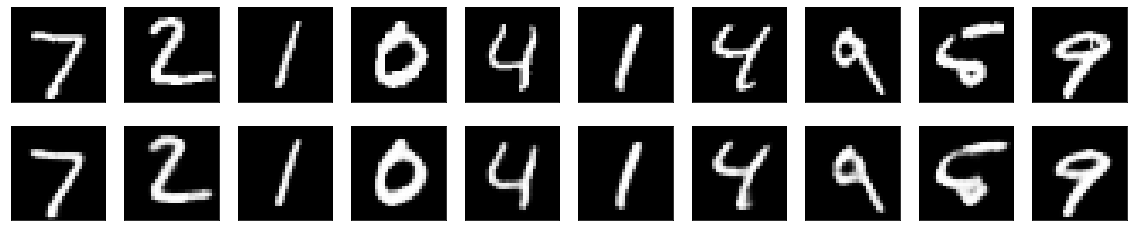

In [63]:
decoded_images = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()